In [27]:
#necessary header files
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from shutil import copyfile

In [29]:
data=pd.read_csv(r'C:\Ecko\CSV\iris.csv')
datacopy=data

In [30]:
datacopy.values[1:120,]

array([[2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],


In [60]:
lblencoder=LabelEncoder()
data['Species']=lblencoder.fit_transform(data['Species'])
feats=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
x=data[feats].values
y=data['Species'].values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
def ginitrain(xtrain,xtest,ytrain):
    clf_gini=DecisionTreeClassifier(criterion='gini',random_state=42)
    clf_gini.fit(xtrain,ytrain)
    return clf_gini

In [62]:
def entropytrain(xtrain,xtest,ytrain):
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=42)
    clf_entropy.fit(xtrain,ytrain)
    return clf_entropy

In [46]:
def prediction(xtest,clf_object):
    ypred=clf_object.predict(xtest)
    print("predict values:")
    print(ypred)
    return ypred

In [38]:
def accuracy(ytest,ypred):
    print("Confusion matrix:",confusion_matrix(ytest,ypred))
    print("Accuracy:",accuracy_score(ytest,ypred)*100)
    print("Report:",classification_report(ytest,ypred))

In [63]:
clf_gini=ginitrain(xtrain,xtest,ytrain)
clf_entropy=entropytrain(xtrain,xtest,ytrain)
print("Result using gini index:")
ypredgini=prediction(xtest,clf_gini)
accuracy(ytest,ypredgini)
print("Result using entropy:")
ypredentropy=prediction(xtest,clf_entropy)
accuracy(ytest,ypredentropy)

Result using gini index:
predict values:
[2 1 0 2 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Confusion matrix: [[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy: 97.77777777777777
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        18
           2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Result using entropy:
predict values:
[2 1 0 2 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Confusion matrix: [[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy: 97.77777777777777
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        18
         

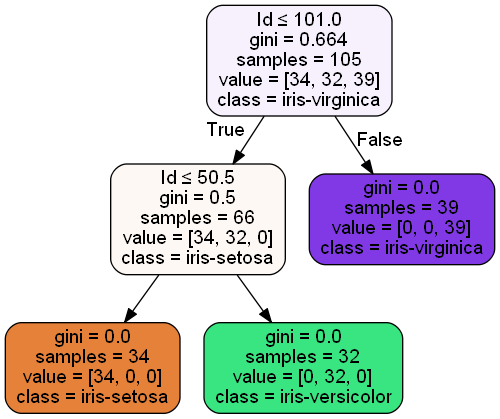

In [65]:
#displaying graph
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=feats,class_names=['iris-setosa','iris-versicolor','iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())